# Project: Investigating the No-show Appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The No-show Appointments dataset contains 110,527 medical appointments with its 14 associated variables/features. Here is a brief description of the features in the dataset:

<ul>
<li>PatientId - Identification of a patient.</li>
<li>AppointmentID - Identification of each appointment.</li>  
<li>Gender - Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.</li>
<li>ScheduledDay - The day of the actuall appointment, when they have to visit the doctor.</li>
<li>AppointmentDay - The day someone called or registered the appointment, this is before appointment of course.</li>
<li>Age - How old is the patient.</li>
<li>Neighbourhood - The location of the hospital.</li>
<li>Scholarship - True or False. Whether or not the patient is enrolled in Brasilian Welfare Program (Bolsa Familia).</li>
<li>Hipertension - True or False.</li>
<li>Diabetes - True or False.</li>
<li>Alcoholism - True or False.</li>
<li>Handcap - True or False.</li>
<li>SMS_received - 1 or more messages sent to the patient.</li>
<li>No-show - True or False. This is treated as the dependent variable.</li>
</ul>

#### Research Questions
<ul>
<li>What factors are most important in predicting if a patient will show up for his/her scheduled appointment?</li>
<li>How many patients were notified by SMS and showed up/missed their scheduled appointments?</li>  
<li>How many patients with Scholarship showed up/missed their scheduled appointments?</li>
<li>How does the Gender column affect No-show column?</li>
<li>Determine the Neighborhood with the least/most No-show?</li>
</ul>

In [1]:
# IMPORTING THE REQUIRED PACKAGES AND SETTING PREFERRED STYLES

import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option("display.max_rows", None, "display.max_columns", 100)
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# LOAD THE DATASET AND PRINT THE FIRST 5 INSTANCES
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv", parse_dates = ['ScheduledDay', 'AppointmentDay'])
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# CHECKING THE DATATYPES OF EACH COLUMN
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

> From the above cell, it can be observed that all the columns are well-formatted with appropriate data types.

In [4]:
# CHECK THE DIMENSIONALITY OF THE DATASET (THAT IS, THE COUNT OF ROWS AND COLUMNS)
df.shape

(110527, 14)

> There are 110,527 instances and 14 features in the dataset.

In [5]:
# CHECKING FOR MISSING VALUES IN THE DATASET
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> From the above cell, it can be observed that there are no missing data in the dataset.

In [6]:
# CHECKING FOR DUPLICATED INSTANCES
df.duplicated().sum()

0

> Also, there are no duplicates in the dataset.

In [7]:
# CHECK THE DESCRIPTIVE STATISTICS OF THE DATASET
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> Let's take an in-depth look at the Age and Handcap columns, the standard deviations of the columns seem to be quite high.

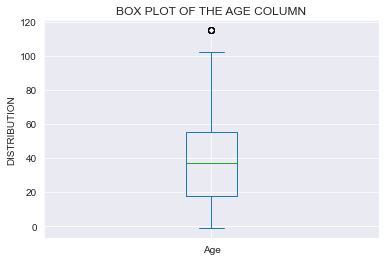

In [8]:
# BOX PLOT OF THE AGE COLUMN
df.Age.plot(kind = 'box')
plt.title("BOX PLOT OF THE AGE COLUMN");
plt.ylabel("DISTRIBUTION");

> There are some outliers with values above 100 in the Age column.

In [9]:
df[df['Age'] > 100]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03 09:14:53+00:00,2016-05-03 00:00:00+00:00,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31 10:19:49+00:00,2016-06-02 00:00:00+00:00,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.482346e+14,5717451,F,2016-05-19 07:57:56+00:00,2016-06-03 00:00:00+00:00,115,SÃO JOSÉ,0,1,0,0,0,1,No


> Although, from the boxplot above, It appeared that there are about 5 outliers in the dataset when the 'Age' column was considered. Moreover, these instances may not be considered as outliers because 4 out of 5 of the patients with age 115 were scheduled for appointment in the same Neighborhood or hospital (ANDORINHAS) with the same health issues. Meanwhile, 3 of them missed their appointments while 2 of them showed up.

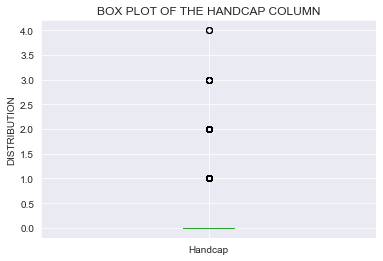

In [10]:
# BOX PLOT OF THE HANDCAP COLUMN
df.Handcap.plot(kind = 'box');
plt.title("BOX PLOT OF THE HANDCAP COLUMN");
plt.ylabel("DISTRIBUTION");

> There are several outliers in the Handcap column.

In [11]:
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

> From the Dataset description, the Handcap column has a boolean value (True or False) which I believe has been transformed to numerical format. This column should therefore have 2 unique values (0 : False and 1 : True). The values 2,3, and 4 in the Handcap column can be considered as outliers and should be dropped.

In [12]:
# FILTER OUT THE INSTANCES WITH HANDCAP VALUES OF 2,3,4
df = df[df['Handcap'].values < 2]

In [13]:
df['Handcap'].value_counts()

0    108286
1      2042
Name: Handcap, dtype: int64

> The dataset is now clean and ready to be used for further analyses.

<a id='eda'></a>
## Exploratory Data Analysis

### How many patients were notified by SMS and showed up/missed their scheduled appointments?

In [14]:
# PERFORMING AN AGGREGATION OPERATION BY APPLYING THE GROUPBY FUNCTION 
df.groupby(['No-show', 'SMS_received'])['SMS_received'].count()

No-show  SMS_received
No       0               62390
         1               25660
Yes      0               12503
         1                9775
Name: SMS_received, dtype: int64

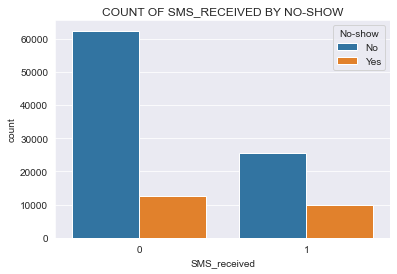

In [15]:
# VISUALIZE THE INFORMATION IN THE ABOVE CELL USING THE COUNTPLOT METHOD IN THE SEABORN PACKAGE
sns.countplot(x = df['SMS_received'], hue = df['No-show']);
plt.title("COUNT OF SMS_RECEIVED BY NO-SHOW");

> From the above plot, it can seen that sending SMS alert to patients does not guarantee whether the patient will show up for the appointment. Just 23.14% of those that received SMS showed up for their appointments whereas about 56.3% of those that were not sent an SMS showed up for their appointments.
><ul>
    <li>25,660 patients received SMS and also showed up for their appointments</li>
    <li>9,775 patients received SMS and did not show up for their appointments</li>
    <li>62,390 patients did not receive SMS and but showed up for their appointments</li>
    <li>12,503 patients did not receive SMS and also did not show up for their appointments</li>
</ul>

### How many patients with Scholarship showed up/missed their scheduled appointments?

In [16]:
# PERFORMING AN AGGREGATION OPERATION BY APPLYING THE GROUPBY FUNCTION 
df.groupby(['No-show', 'Scholarship'])['Scholarship'].count()

No-show  Scholarship
No       0              79784
         1               8266
Yes      0              19701
         1               2577
Name: Scholarship, dtype: int64

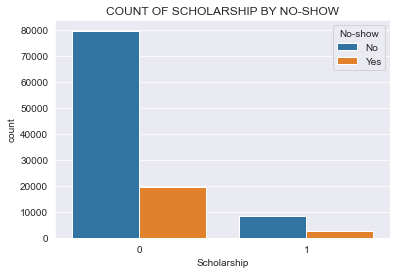

In [17]:
# VISUALIZE THE INFORMATION IN THE ABOVE CELL USING THE COUNTPLOT METHOD IN THE SEABORN PACKAGE
sns.countplot(x = df['Scholarship'], hue = df['No-show']);
plt.title("COUNT OF SCHOLARSHIP BY NO-SHOW");

> It can seen that there are more patients without the Brasilian Welfare Scholarship in the dataset. About 9.83% of the patients in the dataset are enrolled in the scholarship program and about 7.49% of those with scholarship showed up for their appointments. In total, about 20% of the patients missed their appointments.
><ul>
    <li>8,266 patients enrolled in the Brasilian Welfare Scholarship program showed up for their appointments</li>
    <li>2,577 patients enrolled in the Brasilian Welfare Scholarship program missed their appointments</li>
    <li>79,784 patients without scholarship showed up for their appointments</li>
    <li>19,701 patients without scholarship missed their appointments</li>
</ul>

### How does the Gender column affect No-show column?

In [18]:
# PERFORMING AN AGGREGATION OPERATION BY APPLYING THE GROUPBY FUNCTION 
df.groupby(['No-show', 'Gender'])['Gender'].count()

No-show  Gender
No       F         57163
         M         30887
Yes      F         14568
         M          7710
Name: Gender, dtype: int64

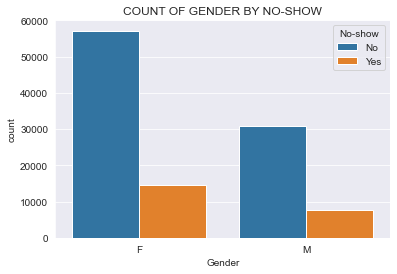

In [19]:
# VISUALIZE THE INFORMATION IN THE ABOVE CELL USING THE COUNTPLOT METHOD IN THE SEABORN PACKAGE
sns.countplot(x = df['Gender'], hue = df['No-show']);
plt.title("COUNT OF GENDER BY NO-SHOW");

> From the above, about 79.7% of the female patients showed up for their appointments while about 80% of the male patients showed up for their appointments. Based on this fact, Gender is not necessarily an important factor for predicting whether a patient would show up for his/her appointment or not.
><ul>
    <li>57,163 female patients showed up for their appointments</li>
    <li>14,568 female patients missed their appointments</li>
    <li>30,887 male patients showed up for their appointments</li>
    <li>7,710 male patients missed their appointments</li>
</ul>

### Determine the Hospital with the least/most No-show?

In [20]:
# PERFORMING AN AGGREGATION OPERATION BY APPLYING THE GROUPBY FUNCTION 
df.groupby(['No-show', 'Neighbourhood'])['Neighbourhood'].count().sort_values(ascending = False)

No-show  Neighbourhood              
No       JARDIM CAMBURI                 6252
         MARIA ORTIZ                    4586
         RESISTÊNCIA                    3517
         JARDIM DA PENHA                3241
         CENTRO                         2629
         SANTA MARTHA                   2622
         ITARARÉ                        2586
         TABUAZEIRO                     2554
         SANTO ANTÔNIO                  2261
         BONFIM                         2221
         JESUS DE NAZARETH              2157
         JABOUR                         2058
         SANTO ANDRÉ                    2058
         CARATOÍRA                      1974
         SÃO PEDRO                      1921
         NOVA PALESTINA                 1859
         DA PENHA                       1782
         ANDORINHAS                     1735
         ROMÃO                          1734
         ILHA DO PRÍNCIPE               1733
         GURIGICA                       1562
         SÃO JOSÉ 

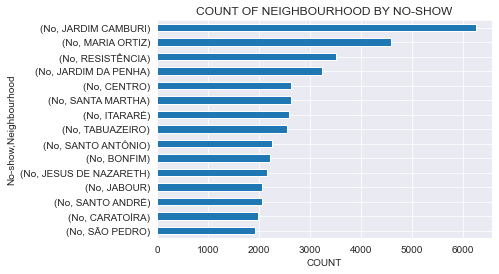

In [21]:
# VISUALIZE THE INFORMATION IN THE ABOVE CELL
df.groupby(['No-show', 'Neighbourhood'])['Neighbourhood'].count().sort_values(ascending = True).tail(15).plot(kind= 'barh');
plt.title("COUNT OF NEIGHBOURHOOD BY NO-SHOW");
plt.xlabel("COUNT");

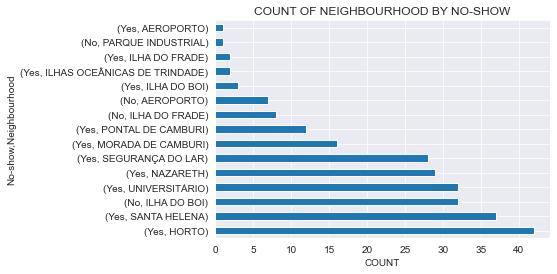

In [22]:
# VISUALIZE THE INFORMATION IN THE ABOVE CELL
df.groupby(['No-show', 'Neighbourhood'])['Neighbourhood'].count().sort_values(ascending = False).tail(15).plot(kind= 'barh');
plt.title("COUNT OF NEIGHBOURHOOD BY NO-SHOW");
plt.xlabel("COUNT");

> The hospital located at JARDIM CAMBURI had the highest number of patients (6,252) that showed up for their appointments while the hospital located at PARQUE INDUSTRIAL had the least number of patients (1) that showed up for their appointments.

> The hospital located at JARDIM CAMBURI also had the highest number of patients (1465) that missed their appointments while the hospital located at AEROPORTO had the least number (1) of patients that missed their appointments.

### What factors are most important in predicting if a patient will show up for his/her scheduled appointment?

>In order to determine the factors that are most important in predicting whether a patient would show up for his/her appointment or not, a correlation analysis between the dependent variable ('No-show') and all other variables is required. This can be achieved using the corr() method available in the pandas dataframe module.

> But before performing the correlation analysis, I would like to create a new column called "Day before Appointment" by substracting the "Scheduled Day" from the "Appointment Day". This new column tells us the number of days between the scheduled-day and the appointment-day.

In [23]:
df['Day(s) before Appointment'] = df['AppointmentDay'] - df['ScheduledDay']
df['Day(s) before Appointment'] = abs(df['Day(s) before Appointment'].dt.days)

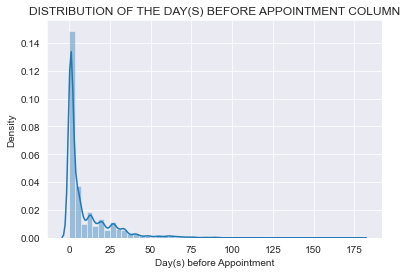

In [24]:
# DISTRIBUTION OF THE DAY(S) BEFORE APPOINTMENT COLUMN
sns.distplot(df['Day(s) before Appointment']);
plt.title("DISTRIBUTION OF THE DAY(S) BEFORE APPOINTMENT COLUMN");

> It is also important to transform some of the columns with object data type to numeric data type so that all the columns can be captured in the analysis.

> From the information above, the Gender, Neighbourhood, and No-show columns are to be transformed to numerical format.

In [25]:
# DEFINING A PYTHON FUNCTION FOR THE COLUMN TRANSFORMATION
def transformer(col):
    df = pd.Categorical(col).codes
    return df

In [26]:
# APPLYING THE DEFINED PYTHON FUNCTION
df[['Gender', 'Neighbourhood', 'No-show']] = df[['Gender', 'Neighbourhood', 'No-show']].apply(transformer)

In [27]:
# PERFORMING THE CORRELATION ANALYSIS USING CORR() METHOD
df.corr()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Day(s) before Appointment
PatientId,1.000000,0.003915,0.008117,-0.004202,0.004009,-0.002706,-0.006520,0.001717,0.011053,-0.008186,-0.009867,-0.001380,-0.000623
AppointmentID,0.003915,1.000000,0.018531,-0.019246,0.005639,0.022745,0.012770,0.022771,0.033112,0.015173,-0.256872,-0.162465,-0.769945
Gender,0.008117,0.018531,1.000000,-0.106834,-0.007899,-0.114295,-0.055977,-0.032707,0.105894,0.020676,-0.046341,-0.003963,-0.026008
Age,-0.004202,-0.019246,-0.106834,1.000000,-0.016056,-0.092113,0.503677,0.291760,0.095687,0.081952,0.012784,-0.060786,0.030599
Neighbourhood,0.004009,0.005639,-0.007899,-0.016056,1.000000,0.006973,0.004289,0.011382,0.000068,0.006857,0.018427,-0.009081,-0.001242
Scholarship,-0.002706,0.022745,-0.114295,-0.092113,0.006973,1.000000,-0.019239,-0.024611,0.035224,-0.009191,0.001204,0.029392,-0.029802
Hipertension,-0.006520,0.012770,-0.055977,0.503677,0.004289,-0.019239,1.000000,0.432265,0.088087,0.081366,-0.006235,-0.036174,-0.020286
Diabetes,0.001717,0.022771,-0.032707,0.291760,0.011382,-0.024611,0.432265,1.000000,0.018635,0.054717,-0.014780,-0.015168,-0.028942
Alcoholism,0.011053,0.033112,0.105894,0.095687,0.000068,0.035224,0.088087,0.018635,1.000000,0.003119,-0.026079,-0.000244,-0.037185
Handcap,-0.008186,0.015173,0.020676,0.081952,0.006857,-0.009191,0.081366,0.054717,0.003119,1.000000,-0.024030,-0.007761,-0.019722


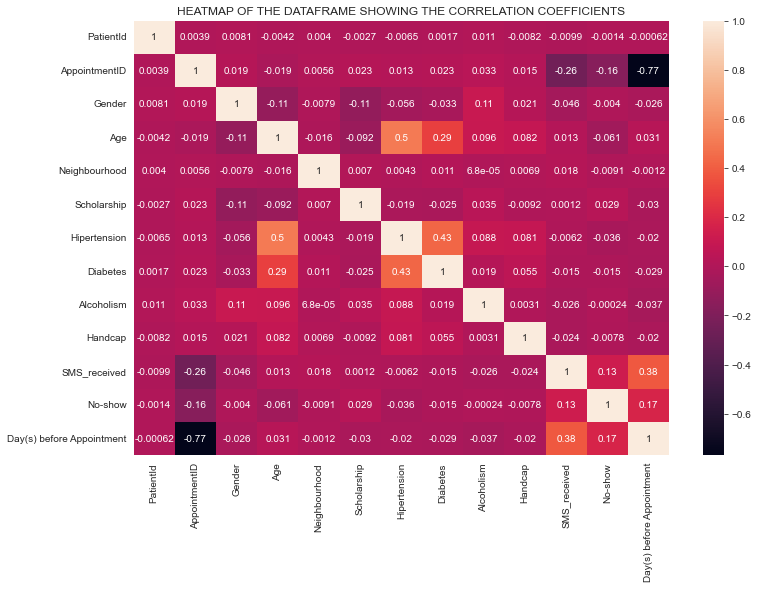

In [28]:
# VISUALIZE THE INFORMATION IN THE ABOVE CELL
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), annot = True);
plt.title("HEATMAP OF THE DATAFRAME SHOWING THE CORRELATION COEFFICIENTS");

> From the above analysis, it can be observed that the "SMS_received" and "Day(s) before Appointment" columns are partly correlated with the "No-show" column. Meanwhile, the "Hipertension" and "Diabetes" columns are also correlated with the "Age" column.

<a id='conclusions'></a>
## Conclusions

>**Results:** Our data suggest that

><ol>
    <li>The dataset had neither null values nor duplicated instances. Although, there are few outliers in the HANDCAP column.</li>
    <li>Sending SMS alert to patients does not guarantee whether the patient will show up for the appointment.</li>
    <li>More patients without scholarship showed up for their appointments whereas about 7.49% of those with scholarship showed up for their appointments.</li>
    <li>Gender is not necessarily an important factor for predicting whether a patient would show up for his/her appointment or not.</li>
    <li>Further statistical analyses such as T-test, F-test, and ANOVA test are needed in order to reinforce a conclusion with regards to the important factors in predicting if a patient will show up for his/her scheduled appointment.</li>
</ol>


>**Limitations:** Here are some of the limitations with the dataset:

><ol>
    <li>Most of the variables are categorical which affected the correlation between the variables.</li>
    <li>Inferences were not made from the analysis since the statistical approach used was descriptive statistics.</li>
    <li>Certain conclusions could not be drawn since there are some missing details about few variables. Findings from the "SMS_received" and "Scholarship" columns seemed counterintuitive.</li>
</ol>